In [1]:
import numpy as np       #importing necessary libraries
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('D:\\Downloads\\indian_liver_patient.csv') #load the dataset

In [29]:
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.describe()      #overview of the data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
df.isnull().any() #check for any null values in the particular column or feature

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [5]:
#Albumin_and_Globulin_Ratio has null values

In [6]:
df.isnull().sum() #4 null values in column Albumin_and_Globulin_Ratio

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
df["Albumin_and_Globulin_Ratio"].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace = True) #fill null values by mean of 
                                                                                                 #that particular column

In [8]:
X = df.iloc[:,:-1].values #features
Y = df.iloc[:,-1].values   #target 

In [9]:
for u in range(len(Y)):
    if Y[u] == 2:
        Y[u] = 0                    # 1 liver disease, 2 no liver disease

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
X[:,1] = lbl.fit_transform(X[:,1])       #female 0 male 1

In [11]:
X #FEATURES  

array([[65, 0, 0.7, ..., 6.8, 3.3, 0.9],
       [62, 1, 10.9, ..., 7.5, 3.2, 0.74],
       [62, 1, 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 1, 0.8, ..., 6.4, 3.2, 1.0],
       [31, 1, 1.3, ..., 6.8, 3.4, 1.0],
       [38, 1, 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [12]:
Y #TARGET

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


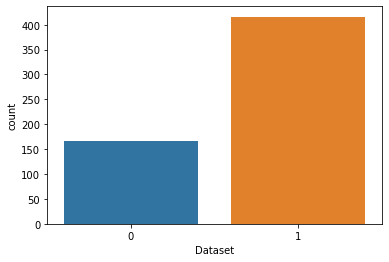

In [13]:
import seaborn as sns
sns.countplot(data=df, x = 'Dataset', label='Count')

l,nl = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',l)
print('Number of patients not diagnosed with liver disease: ',nl)

no of male patients:  441
Number of female patients:  142


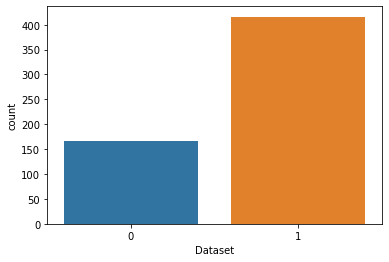

In [14]:
import seaborn as sns
sns.countplot(data=df, x = 'Dataset', label='Count')

mp,fp = df['Gender'].value_counts()
print('no of male patients: ',mp)
print('Number of female patients: ',fp)
#0 female 1 male

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=18,test_size=0.25)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
p=X_train
q=Y_train  #p and used for logistic regrerssion without scikitklearn

In [18]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))
def loss(x,w,y,b):
    s=sigmoid(x,w,b) #s is calculated output y is original output
    return np.mean(-(y*np.log(s))- ((1-y)*np.log(1-s)))
def grad(x,y,w,b):
    s=sigmoid(x,w,b)    
    return np.dot(x.T,(s-y))/p.shape[0]  #p= size of feature dataset

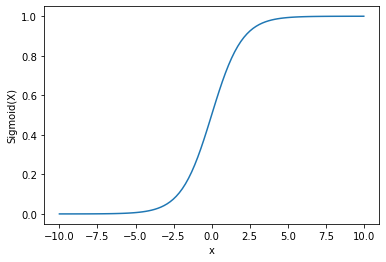

In [19]:
import matplotlib.pyplot as plt

  
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [20]:
def accuracy(y_pred,y_test):
    return np.mean(y_pred==y_test)

In [21]:
def gradientdescent(x,y):
    w=np.zeros((x.shape[1]))
    b=np.zeros(1)
    ite=2000      #number of iteration to update weights
    eta=0.1  #learning rate or say it as alpha
    loss_v=[]  #loss
    for i in range(ite):
        probability=sigmoid(x,w,b)
        l=loss(x,w,y,b)
        gradient=grad(x,y,w,b)
        w=w-(eta*gradient)  #update the weights
        b=b-(eta*np.sum(probability-y)/x.shape[0]) #update bias
        loss_v.append(l) #used to plot graph of loss (log loss)
        print(l)
    return w,b,loss_v

In [22]:
w,b,loss_v=gradientdescent(p,q) #w weight b bias loss_v is log loss  P AND Q ARE X_TRAIN AND Y_TRAIN
y_pred=sigmoid(X_test,w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
        
    else:
        y_pred[j]=1
        

print('test accuracy boy',accuracy(y_pred,Y_test)*100)

0.6931471805599454
0.6838479233383095
0.675468425007495
0.6678915163643139
0.6610129936248269
0.6547421066150906
0.6490008753076246
0.6437228058623894
0.6388513978736886
0.6343386706161384
0.6301438204161244
0.6262320510432373
0.6225735810984268
0.6191428143874997
0.6159176524465576
0.6128789273091202
0.610009934186319
0.6072960463233906
0.604724397073909
0.6022836168223575
0.599963614643458
0.5977553964852528
0.5956509132261308
0.5936429332270842
0.5917249350267109
0.589891016651892
0.5881358186799482
0.5864544587204669
0.58484247541299
0.5832957803814934
0.5818106168648552
0.5803835239677497
0.5790113056592149
0.577691003794969
0.5764198745610855
0.5751953678361814
0.5740151090510713
0.5728768831922544
0.5717786206513293
0.5707183846686517
0.5696943601579673
0.5687048437308161
0.5677482347662994
0.5668230273942889
0.5659278032790597
0.5650612251062681
0.5642220306896696
0.563409027625392
0.5626210884312738
0.5618571461170478
0.5611161901381911
0.560397262692304
0.5596994553220502
0.5

0.5146905851353327
0.5146845925717638
0.5146786132859422
0.5146726472350935
0.5146666943766306
0.5146607546681534
0.5146548280674467
0.5146489145324803
0.5146430140214074
0.5146371264925637
0.5146312519044659
0.5146253902158118
0.5146195413854782
0.5146137053725206
0.5146078821361717
0.514602071635841
0.5145962738311133
0.5145904886817481
0.5145847161476783
0.5145789561890094
0.5145732087660191
0.5145674738391554
0.514561751369036
0.5145560413164477
0.5145503436423455
0.514544658307851
0.5145389852742522
0.5145333245030025
0.514527675955719
0.514522039594183
0.5145164153803378
0.5145108032762888
0.5145052032443018
0.514499615246803
0.514494039246377
0.5144884752057675
0.5144829230878746
0.5144773828557557
0.5144718544726234
0.5144663379018455
0.5144608331069433
0.5144553400515919
0.514449858699618
0.5144443890150007
0.5144389309618691
0.5144334845045029
0.5144280496073301
0.5144226262349278
0.5144172143520204
0.5144118139234789
0.5144064249143204
0.5144010472897073
0.5143956810149464
0

0.5121100502983492
0.5121085778052249
0.5121071072068129
0.5121056384998445
0.512104171681058
0.512102706747199
0.5121012436950203
0.5120997825212815
0.5120983232227495
0.5120968657961984
0.512095410238409
0.5120939565461693
0.5120925047162747
0.5120910547455269
0.5120896066307349
0.5120881603687151
0.5120867159562899
0.5120852733902894
0.5120838326675503
0.5120823937849164
0.5120809567392379
0.5120795215273723
0.5120780881461838
0.5120766565925432
0.5120752268633284
0.5120737989554239
0.5120723728657209
0.5120709485911177
0.5120695261285189
0.5120681054748359
0.5120666866269867
0.5120652695818966
0.5120638543364966
0.5120624408877248
0.512061029232526
0.5120596193678517
0.5120582112906594
0.5120568049979137
0.5120554004865857
0.5120539977536526
0.5120525967960986
0.5120511976109141
0.5120498001950962
0.5120484045456482
0.5120470106595799
0.5120456185339077
0.5120442281656544
0.5120428395518489
0.5120414526895267
0.5120400675757296
0.5120386842075058
0.5120373025819095
0.51203592269600

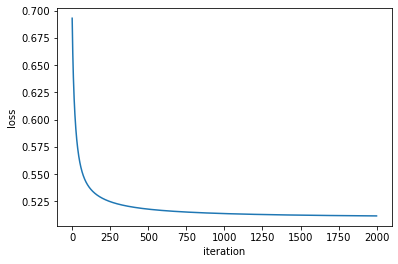

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [24]:
#without using built in function accuracy is around 78.08%

In [25]:
from sklearn.linear_model import LogisticRegression   #comparing with sklearn built in

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
log_predicted= logreg.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: \n', accuracy_score(Y_test,log_predicted)*100)

Accuracy: 
 78.76712328767124


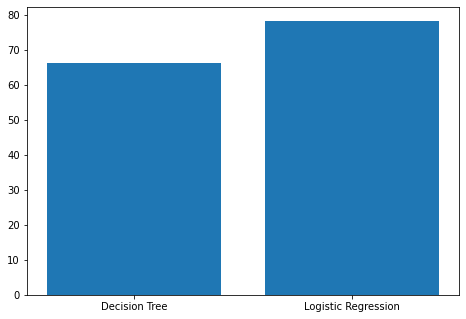

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
u=["Decision Tree","Logistic Regression"]
v=[66.09,78.31]
ax.bar(u,v)

plt.show()

In [35]:
for i in range (0,45):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=i,test_size=0.25)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    log_predicted= logreg.predict(X_test)
    print("Accuracy: for random state ",i,"is", accuracy_score(Y_test,log_predicted)*100)
    
    
    

Accuracy: for random state  0 is 69.17808219178082
Accuracy: for random state  1 is 73.28767123287672
Accuracy: for random state  2 is 74.65753424657534
Accuracy: for random state  3 is 73.28767123287672
Accuracy: for random state  4 is 70.54794520547945
Accuracy: for random state  5 is 68.4931506849315
Accuracy: for random state  6 is 72.6027397260274
Accuracy: for random state  7 is 73.97260273972603
Accuracy: for random state  8 is 73.28767123287672
Accuracy: for random state  9 is 71.23287671232876
Accuracy: for random state  10 is 70.54794520547945
Accuracy: for random state  11 is 75.34246575342466
Accuracy: for random state  12 is 73.28767123287672
Accuracy: for random state  13 is 70.54794520547945
Accuracy: for random state  14 is 71.23287671232876
Accuracy: for random state  15 is 76.71232876712328
Accuracy: for random state  16 is 67.12328767123287
Accuracy: for random state  17 is 60.95890410958904
Accuracy: for random state  18 is 78.76712328767124
Accuracy: for random sta